In [157]:
import os, sys
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [158]:
#Execute this script to set values for different parameters:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 200

In [159]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open('fra.txt', encoding="utf-8"):
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    input_sentence = line.rstrip().split('\t')[0]
    output = line.rstrip().split('\t')[1]

    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("Number of sample input:", len(input_sentences))
print("Number of sample output:", len(output_sentences))
print("Number of sample output input:", len(output_sentences_inputs))

Number of sample input: 20000
Number of sample output: 20000
Number of sample output input: 20000


In [160]:
print("English sentence: ",input_sentences[180])
print("French translation: ",output_sentences[180])

English sentence:  Be fair.
French translation:  Soyez honnêtes. <eos>


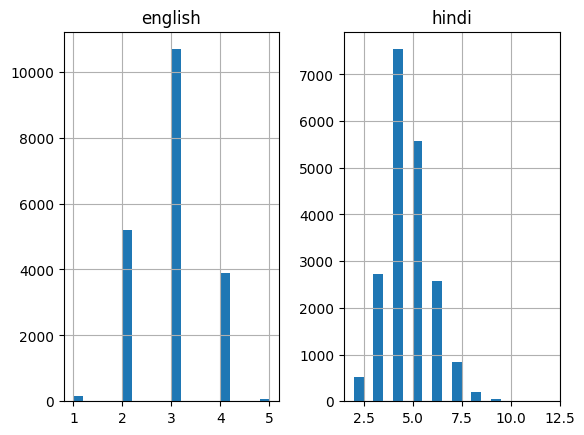

In [161]:
# let’s visualise the length of the sentences.
import pandas as pd

eng_len = []
hin_len = []

# populate the lists with sentence lengths
for i in input_sentences:
      eng_len.append(len(i.split()))  

for i in output_sentences:
      hin_len.append(len(i.split()))

length_df = pd.DataFrame({'english':eng_len, 'hindi':hin_len})

length_df.hist(bins = 20)
plt.show()

In [162]:
#tokenize the input sentences(input language) 
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)
print(input_integer_seq)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

#with open('input_tokenizer_NMT.pickle', 'wb') as handle:
#    pickle.dump(input_tokenizer, handle, protocol=4)

[[16], [16], [16], [16], [548], [548], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [120], [52], [1414], [1414], [1414], [1189], [1189], [1189], [592], [54], [697], [697], [636], [636], [50], [50], [50], [104], [104], [104], [104], [104], [104], [104], [758], [758], [16, 45], [16, 45], [16, 45], [637], [637], [637], [637], [637], [637], [1, 68], [1, 68], [1, 80], [1, 171], [1, 171], [1, 171], [1030, 33], [378], [378], [378], [378], [378], [378], [378], [378], [378], [378], [378], [378], [549], [549], [549], [257], [593], [593], [593], [593], [190, 4], [190, 4], [190, 4], [190, 4], [1190], [1190], [1190], [1190], [113, 4], [113, 4], [1191], [27, 30], [27, 30], [27, 30], [16, 64], [16, 64], [16, 64], [55, 4], [55, 4], [55, 4], [55, 4], [55, 4], [55, 4], [1721, 37], [1721, 37], [514, 8], [514, 8], [1, 324], [1, 324], [1, 2357], [1, 2358], [1, 2359], [1, 79], [1, 150], [1, 150], [1, 362], [1, 77], [1, 408], [1, 408], [1, 408], [1,

In [163]:
#tokenize the output sentences(Output language)
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)
print(output_input_integer_seq)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

#with open('output_tokenizer_NMT.pickle', 'wb') as handle:
#    pickle.dump(output_tokenizer, handle, protocol=4)

[[2, 45, 4], [2, 542], [2, 24, 449, 4], [2, 419, 4], [2, 1461, 4], [2, 2658], [2, 2659], [2, 2660], [2, 113, 239, 1179, 21, 239, 1920, 4], [2, 1462, 4], [2, 1921, 4], [2, 668, 4], [2, 2661, 4], [2, 2662, 4], [2, 2659], [2, 2660], [2, 113, 239, 1179, 21, 239, 1920, 4], [2, 1462, 4], [2, 1921, 4], [2, 668, 4], [2, 2661, 4], [2, 2662, 4], [2, 32, 6], [2, 27, 4466], [2, 4467], [2, 4468], [2, 21, 4469], [2, 4470], [2, 4471], [2, 65, 752, 4], [2, 21, 2663], [2, 4472], [2, 4473], [2, 1922], [2, 1922], [2, 27, 2664], [2, 4474], [2, 1463, 4], [2, 299, 4], [2, 354, 4], [2, 1180], [2, 299, 4], [2, 354, 4], [2, 2665], [2, 1180], [2, 1923], [2, 1924], [2, 4475], [2, 4476], [2, 4477], [2, 1464, 4], [2, 1461, 4], [2, 1464, 4], [2, 1461, 4], [2, 669], [2, 2658], [2, 3, 1465], [2, 4478], [2, 2666], [2, 17, 383, 4], [2, 3, 75, 1008, 4], [2, 126, 340], [2, 4479, 505, 4], [2, 1181], [2, 1925], [2, 1926], [2, 2667, 2668], [2, 2669, 2670], [2, 44, 1466], [2, 1927, 4], [2, 1182, 4], [2, 2671], [2, 1183, 4], 

In [164]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[180]:", encoder_input_sequences[180])

encoder_input_sequences.shape: (20000, 5)
encoder_input_sequences[180]: [  0   0   0  22 313]


In [165]:
print(word2idx_inputs["join"])
print(word2idx_inputs["us"])

459
57


In [166]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[180]:", decoder_input_sequences[180])

decoder_input_sequences.shape: (20000, 12)
decoder_input_sequences[180]: [   2   52 1939    0    0    0    0    0    0    0    0    0]


In [167]:
print(word2idx_outputs["<sos>"])
print(word2idx_outputs["joignez-vous"])
print(word2idx_outputs["à"])
print(word2idx_outputs["nous."])

2
2702
21
230


In [168]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)

decoder_output_sequences.shape: (20000, 12)


In [169]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    rec = line.split()
    word = rec[0]
    vector_dimensions = asarray(rec[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [170]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [171]:
print(embeddings_dictionary["let"])

[ 3.4694e-01  4.4125e-01 -9.1390e-02 -2.7513e-01 -1.5626e-01  1.2745e-01
  1.0123e+00 -6.3739e-02  2.6857e-01  3.5467e-01  2.2819e-01  2.3822e-01
 -5.1567e-01 -4.5428e-02 -4.9780e-01 -3.2548e-01 -5.1655e-01 -2.6536e-01
  1.9441e-01 -1.2741e-01 -8.8370e-02 -8.8681e-03  6.4718e-03  3.8851e-01
 -4.2942e-02  9.9134e-01  1.9310e-01  1.7256e-01  2.8893e-01 -1.8962e-01
  1.9765e-01 -1.2038e-01 -9.6212e-02  6.1418e-01 -8.0160e-02  4.3525e-01
  5.8955e-02 -2.7100e-03  2.9356e-02  2.4509e-02  5.1763e-01  1.2741e-01
  4.8351e-02 -3.0958e-01  1.2206e-01 -1.4328e-01  3.8568e-01 -1.2560e-01
  4.4711e-02  4.7729e-01  3.5749e-01 -1.3244e-01  2.9732e-01  7.3063e-02
  4.0140e-01 -6.6897e-01 -5.8726e-01  9.5602e-02  1.4986e-01  2.7200e-01
  4.9714e-01  7.6474e-02  5.4347e-02  2.8859e-01  2.0969e-02 -3.3344e-01
  2.0404e-01  6.2120e-02  1.1181e-01  5.2891e-01 -2.1955e-01 -9.7089e-02
 -4.2836e-01  2.8855e-01  1.8030e-02 -1.0814e-01  4.5335e-02 -1.7039e-01
 -1.0511e-01  1.1734e-01  3.5240e-01  6.4348e-02  1

In [172]:
print(embedding_matrix[152])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [173]:
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [174]:
#(number of inputs, length of the output sentence, the number of words in the output)

In [175]:
decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)
decoder_targets_one_hot.shape

(20000, 12, 9438)

In [176]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [177]:
encoder_inputs = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [178]:
decoder_inputs = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [179]:
decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [186]:
#Compile

model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_13 (InputLayer)   │ (None, 12)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_7 (Embedding)       │ (None, 5, 200)            │         669,800 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_8 (Embedding)       │ (None, 12, 256)           │       2,416,128 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_6 (LSTM)                 │ [(None, 256), (None,      │         467,968 │ embedding_7[0][0]          │
│                               │ 256), (None, 256)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_7 (LSTM)                 │ [(None, 12, 256), (None,  │         525,312 │ embedding_8[0][0],         │
│                               │ 256), (None, 256)]        │                 │ lstm_6[0][1], lstm_6[0][2] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 12, 9438)          │       2,425,566 │ lstm_7[0][0]               │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 6,504,774 (24.81 MB)

 Trainable params: 6,504,774 (24.81 MB)

 Non-trainable params: 0 (0.00 B)

In [187]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [188]:
history = model.fit([encoder_input_sequences, decoder_input_sequences], decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=20,
    callbacks=[es],
    validation_split=0.1,
)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 73s 226ms/step - accuracy: 0.6607 - loss: 3.1198 - val_accuracy: 0.6802 - val_loss: 2.2339
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 62s 220ms/step - accuracy: 0.7367 - loss: 1.8855 - val_accuracy: 0.6991 - val_loss: 2.1368
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 61s 218ms/step - accuracy: 0.7533 - loss: 1.7235 - val_accuracy: 0.7223 - val_loss: 1.9939
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 62s 219ms/step - accuracy: 0.7641 - loss: 1.6018 - val_accuracy: 0.7287 - val_loss: 1.8941
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 62s 220ms/step - accuracy: 0.7760 - loss: 1.5004 - val_accuracy: 0.7457 - val_loss: 1.7861
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 64s 226ms/step - accuracy: 0.7904 - loss: 1.4021 - val_accuracy: 0.7528 - val_loss: 1.7201
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 62s 221ms/step - accuracy: 0.7997 - loss: 1.3370 - val_accuracy: 0.7588 - val_loss: 1.6708
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 65s 231ms/step - accuracy: 0.8090 - loss: 1

In [191]:
model.save('seq2seq_eng-fra.keras')

In [223]:
from tensorflow.keras.models import load_model

model = load_model('seq2seq_eng-fra.keras')

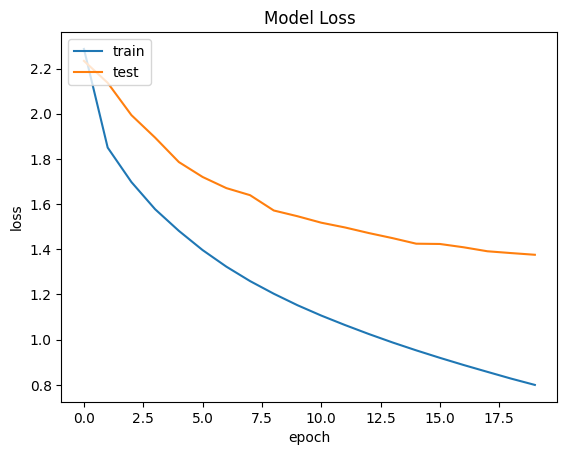

In [224]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [225]:
encoder_model = Model(encoder_inputs, encoder_states)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.load_weights('seq2seq_eng-fra.keras')

In [226]:
decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [227]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)


In [228]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [229]:
decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

In [230]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [231]:
idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}

In [232]:
def translate_sentence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [235]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
translation = translate_sentence(input_seq)
print('Input Language : ', input_sentences[i])
print('Actual translation : ', output_sentences[i])
print('French translation : ', translation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Input Language :  Tom knows me.
Actual translation :  Tom me connaît. <eos>
French translation :  tom me demande à moi.
